# Load All API

In [2]:
import nltk
from nltk.wsd import lesk
from nltk.corpus import wordnet as wn
from collections import Counter
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
import numpy as np
import scipy.stats.stats as st
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.wsd import lesk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
#from stemming.porter2 import stem
from nltk import PorterStemmer
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
from string import digits
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import csv

import re
from nltk import word_tokenize
import string
#!pip install gensim
import gensim.models as md
from gensim.models.phrases import Phrases, Phraser
import os
from sklearn.datasets import fetch_20newsgroups
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('reuters')
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wnic
from nltk.tokenize import word_tokenize


## Settings **Codes**

In [3]:
def read_cvs_by_pands(path_database,file_databbase,index_col, header):
    return pd.read_csv(path_database+file_databbase,index_col=index_col,header=header,sep=',')

In [4]:
def txt_pragraphs(str):
    pragraphs = str.split("\n\n")
    return pragraphs

In [5]:
def read_text_from_database(path_database,file_databbase):
    queue_paragraph=[]
    #f = open(sys.argv[1], 'rt')
    outfile = open(path_database+file_databbase,'rt')
    try:
                
        reader=csv.reader(outfile)
        for row in reader:
            queue_paragraph.append(row)
            #print (row)
    finally:
        print ("row")
        outfile.close()
        
    return queue_paragraph

In [6]:
'''
Write Excell sheet
'''
def save_file_to_database(data_rows,path_database,file_databbase,header_list):#header_list=['index','text']
    outfile = open(path_database+file_databbase,'w')
    writer=csv.writer(outfile)
    #header_list=['uuid','paragraph','doc_id']
    i=0
    for line in data_rows:
        row=[i,line]#,'paragraph no.'+str(i)]
        if i==0:
            
            writer.writerow(header_list)
            writer.writerow(row)
        else:
            #print('ff')
            writer.writerow(row)
        i+= 1
        #outfile.close()

In [7]:
import csv   
def add_row(row,path_database,file_name):
    #fields=['first','second','third']
    with open(path_database+file_name, 'a') as f:
        writer = csv.writer(f)
        writer.writerow(row)
        print("printed")

In [8]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3+height,
                '%d' % int(height+.5),
                ha='center', va='bottom')
    

In [9]:
def top_term_top_topic_all(keyword,H_df,top_topic,top_term,path_database,report_topic_term):
    H4_20=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)
    H4_20_max5=H4_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    df_H4_20_max5 = pd.DataFrame(H4_20_max5)#
    df_H4_20_max5
    d={}
    for i in range(len(df_H4_20_max5.index)):

        list_topic_word=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)[df_H4_20_max5.index[i]].sort_values(ascending=False)[:top_term]
        #pd.DataFrame(df)
        d[df_H4_20_max5.index[i]]=list_topic_word#.index
    #print(d)
    final_df=pd.DataFrame(d,columns=df_H4_20_max5.index)
    final_df.to_csv(path_database+report_topic_term)
    return final_df

In [10]:
""" NOTES:
      - requires Python 2.4 or greater
      - elements of the lists must be hashable
      - order of the original lists is not preserved
"""
def unique(a):
    """ return the list with duplicate elements removed """
    return list(set(a))

def intersect(a, b):
    """ return the intersection of two lists """
    return list(set(a) & set(b))

def union(a, b):
    """ return the union of two lists """
    return list(set(a) | set(b))

In [11]:
def top_term_top_topic_all_siketLearn(keyword,H_df,top_topic,top_term,path_database,report_topic_term,t):
    final_df=top_term_top_topic_all(keyword, H_df ,top_topic, top_term, path_database, report_topic_term).T[t[t.columns[0]]].T.fillna('N/A')
    #final_df.fillna('N/A')
    final_df.to_csv(path_database+report_topic_term)
    
    return final_df

In [12]:
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wnic
from nltk.tokenize import word_tokenize

def similarity_by_infocontent(sense1, sense2, option):
    #sense1="Synset('"+sense1+"')"
    #sense2="Synset('"+sense2+"')"
    sense1 = wn.synset(sense1)
    sense2 = wn.synset(sense2)
    #print(sense1,sense2)
    """ Returns similarity scores by information content. """
    #if sense1.pos != sense2.pos: # infocontent sim can't do diff POS.
        #return 0

    info_contents = ['ic-bnc-add1.dat', 'ic-bnc-resnik-add1.dat', 
                     'ic-bnc-resnik.dat', 'ic-bnc.dat', 

                     'ic-brown-add1.dat', 'ic-brown-resnik-add1.dat', 
                     'ic-brown-resnik.dat', 'ic-brown.dat', 

                     'ic-semcor-add1.dat', 'ic-semcor.dat',

                     'ic-semcorraw-add1.dat', 'ic-semcorraw-resnik-add1.dat', 
                     'ic-semcorraw-resnik.dat', 'ic-semcorraw.dat', 

                     'ic-shaks-add1.dat', 'ic-shaks-resnik.dat', 
                     'ic-shaks-resnink-add1.dat', 'ic-shaks.dat', 

                     'ic-treebank-add1.dat', 'ic-treebank-resnik-add1.dat', 
                     'ic-treebank-resnik.dat', 'ic-treebank.dat']

    if option in ['res', 'resnik']:
        #return wn.res_similarity(sense1, sense2, wnic.ic('ic-bnc-resnik-add1.dat'))
        #print('simRe snik (c1,c2) = -log p(lso(c1,c2)) = IC(lso(c1,c2)')
        return wn.res_similarity(sense1, sense2, wnic.ic('ic-treebank-resnik-add1.dat'))
    #return min(wn.res_similarity(sense1, sense2, wnic.ic(ic)) \
    #             for ic in info_contents)

    elif option in ['jcn', "jiang-conrath"]:
        #return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(jcn) (c1,c2 )= (IC(c1) + IC(c2 )) - 2IC(lso(c1,c2 ))')
        return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

    elif option in ['lin']:
        #return wn.lin_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(lin) (c1,c2)=(2IC(lso(c1,c2 )))/(IC(c1)+IC(c2))')
        return wn.lin_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

def sim(sense1, sense2, option="path"):
    """ Calculates similarity based on user's choice. """
    option = option.lower()
    if option.lower() in ["path", "path_similarity", 
                        "wup", "wupa", "wu-palmer", "wu-palmer",
                        'lch', "leacock-chordorow"]:
        return similarity_by_path(sense1, sense2, option) 
    elif option.lower() in ["res", "resnik",
                          "jcn","jiang-conrath",
                          "lin"]:
        return similarity_by_infocontent(sense1, sense2, option)

def max_similarity(context_sentence, ambiguous_word, option="path", 
                   pos=None, best=True):
    """
    Perform WSD by maximizing the sum of maximum similarity between possible 
    synsets of all words in the context sentence and the possible synsets of the 
    ambiguous words (see http://goo.gl/XMq2BI):
    {argmax}_{synset(a)}(\sum_{i}^{n}{{max}_{synset(i)}(sim(i,a))}
    """
    result = {}
    for i in wn.synsets(ambiguous_word):
        try:
            if pos and pos != str(i.pos()):
                continue
        except:
            if pos and pos != str(i.pos):
                continue
        result[i] = sum(max([sim(i,k,option) for k in wn.synsets(j)]+[0]) \
                        for j in word_tokenize(context_sentence))

    if option in ["res","resnik"]: # lower score = more similar
        result = sorted([(v,k) for k,v in result.items()])
    else: # higher score = more similar
        result = sorted([(v,k) for k,v in result.items()],reverse=True)
    #print (result)
    if best: return result[0][1];
    return result

In [13]:
def semantic_network(list_terms,imagename):
    import networkx as nx
    import numpy as np
    import matplotlib.pyplot as plt
    import pylab
    %matplotlib inline  
    #list_terms=['microphone.n.01','range.n.04','cam.n.02','volt.n.01','mistake.n.01','mode.n.06','fiberglass.n.01','million.n.01','turk.n.01','keyboard.n.01']
    #list_terms=['m','r','c','v']
    G = nx.DiGraph()
    #G.add_edges_from([('A', 'A')], weight=5)
    for i in range(len(list_terms)):
        for x in range(i,len(list_terms)):
            if i !=x:

                a = (list_terms[i],)
                #print(a)
                l = list(a)
                #if x <len(list_terms)-1:
                l.append(list_terms[x])
                b=tuple(l)
                w=similarity_by_infocontent(list_terms[i],list_terms[x],'res')
                #w=i**x
                #print(b,w)
                G.add_edges_from([b], weight=w)


    val_map = {'microphone.n.01': 100.0,
               'range.n.04': 75,
               'cam.n.02': 50,
              'volt.n.01':52}

    values = [val_map.get(node, 0.45) for node in G.nodes()]
    edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    #print(edge_labels.values())
    #red_edges = [('C','D'),('D','A')]
    #edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]
    edge_colors = ['black' if edge !=0 else 'red' for edge in edge_labels.values()]

    pos=nx.layout.shell_layout(G)#spring_layout(G)

    pylab.figure(3,figsize=(20,20))

    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    s=nx.draw(G,pos, node_color = values, node_size=7550,edge_color=edge_colors,edge_cmap=plt.cm.Reds,with_labels=True)
    #G = nx.DiGraph(directed=True)
    #import matplotlib.pyplot as plt
    #plt.rcParams["figure.figsize"] = (2000,3000)
    #pylab.plot(.1,.2)
    #plt.figure(figsize=(300, 300))
    #pylab.size(300*300)
    plt.savefig(imagename, format="PNG", dpi=600)
    #pylab.savefig(imagename, format="PNG")
    #plt.close()
    pylab.show()




In [41]:
def semantic_network_df(df,imagename):
    list_terms=df.columns
    import networkx as nx
    import numpy as np
    import matplotlib.pyplot as plt
    import pylab
    %matplotlib inline  
    #list_terms=['microphone.n.01','range.n.04','cam.n.02','volt.n.01','mistake.n.01','mode.n.06','fiberglass.n.01','million.n.01','turk.n.01','keyboard.n.01']
    #list_terms=['m','r','c','v']
    G = nx.DiGraph()
    #G.add_edges_from([('A', 'A')], weight=5)
    for i in range(len(list_terms)):
        for x in range(i,len(list_terms)):
            if i !=x:

                a = (list_terms[i],)
                #print(a)
                l = list(a)
                #if x <len(list_terms)-1:
                l.append(list_terms[x])
                b=tuple(l)
                w=df.ix[df.columns[i]][df.columns[x]]#similarity_by_infocontent(list_terms[i],list_terms[x],'res')
                #w=i**x
                #print(b,w)
                G.add_edges_from([b], weight=w)


    val_map = {'microphone.n.01': 100.0,
               'range.n.04': 75,
               'cam.n.02': 50,
              'volt.n.01':52}

    values = [val_map.get(node, 0.45) for node in G.nodes()]
    edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    #print(edge_labels.values())
    #red_edges = [('C','D'),('D','A')]
    #edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]
    edge_colors = ['black' if edge !=0 else 'red' for edge in edge_labels.values()]

    pos=nx.layout.shell_layout(G)#spring_layout(G)

    pylab.figure(3,figsize=(20,20))

    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    s=nx.draw(G,pos, node_color = values, node_size=7550,edge_color=edge_colors,edge_cmap=plt.cm.Reds,with_labels=True)
    #G = nx.DiGraph(directed=True)
    #import matplotlib.pyplot as plt
    #plt.rcParams["figure.figsize"] = (2000,3000)
    #pylab.plot(.1,.2)
    #plt.figure(figsize=(300, 300))
    #pylab.size(300*300)
    plt.savefig(imagename, format="PNG", dpi=600)
    #pylab.savefig(imagename, format="PNG")
    #plt.close()
    pylab.show()




In [15]:
def semantic_network_less_than_1(list_terms,imagename):
    import networkx as nx
    import numpy as np
    import matplotlib.pyplot as plt
    import pylab
    %matplotlib inline  
    #list_terms=['microphone.n.01','range.n.04','cam.n.02','volt.n.01','mistake.n.01','mode.n.06','fiberglass.n.01','million.n.01','turk.n.01','keyboard.n.01']
    #list_terms=['m','r','c','v']
    G = nx.DiGraph()
    #G.add_edges_from([('A', 'A')], weight=5)
    for i in range(len(list_terms)):
        for x in range(i,len(list_terms)):
            if i !=x:

                a = (list_terms[i],)
                #print(a)
                l = list(a)
                #if x <len(list_terms)-1:
                l.append(list_terms[x])
                b=tuple(l)
                w=similarity_by_infocontent(list_terms[i],list_terms[x],'res')
                #w=i**x
                #print(b,w)
                G.add_edges_from([b], weight=w)


    val_map = {'microphone.n.01': 100.0,
               'range.n.04': 75,
               'cam.n.02': 50,
              'volt.n.01':52}

    values = [val_map.get(node, 0.45) for node in G.nodes()]
    edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    #print(edge_labels.values())
    #red_edges = [('C','D'),('D','A')]
    #edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]
    edge_colors = ['black' if edge <1 else 'red' for edge in edge_labels.values()]

    pos=nx.layout.shell_layout(G)#spring_layout(G)

    pylab.figure(3,figsize=(20,20))

    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    s=nx.draw(G,pos, node_color = values, node_size=7550,edge_color=edge_colors,edge_cmap=plt.cm.Reds,with_labels=True)
    #G = nx.DiGraph(directed=True)
    #import matplotlib.pyplot as plt
    #plt.rcParams["figure.figsize"] = (2000,3000)
    #pylab.plot(.1,.2)
    #plt.figure(figsize=(300, 300))
    #pylab.size(300*300)
    plt.savefig(imagename, format="PNG", dpi=600)
    #pylab.savefig(imagename, format="PNG")
    #plt.close()
    pylab.show()



In [16]:
def counter_conditions_tables(path_database,main_table,counting_table,counting_column_name,condition,num_after_cond):
    df_Thresholding=read_cvs_by_pands(path_database,main_table,index_col=0,header=0)
    if condition =='!=':
        r=(df_Thresholding != num_after_cond).sum(axis=0)#columns
    if condition =='==':
        r=(df_Thresholding == num_after_cond).sum(axis=0)
    if condition =='>=':
        r=(df_Thresholding >= num_after_cond).sum(axis=0)
    if condition =='<=':
        r=(df_Thresholding <= num_after_cond).sum(axis=0)
    if condition =='<':
        r=(df_Thresholding < num_after_cond).sum(axis=0)
    if condition =='>':
        r=(df_Thresholding > num_after_cond).sum(axis=0)
    #print(type(r))
    df=pd.DataFrame(r,columns=[counting_column_name])
    df.T.to_csv(path_database+counting_table)#columns=df_Thresholding.columns)
    return df
     


In [17]:
'''
get all terms for top 5 or top_topic
'''

def top_topic_all(keyword,H_df,top_topic,top_term,path_database,report_topic_term):
    H4_20=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)
    H4_20_max5=H4_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    df_H4_20_max5 = pd.DataFrame(H4_20_max5)#
    df_H4_20_max5
    d={}
    for i in range(len(df_H4_20_max5.index)):

        list_topic_word=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)[df_H4_20_max5.index[i]].sort_values(ascending=False)#[:top_term]
        #pd.DataFrame(df)
        d[df_H4_20_max5.index[i]]=list_topic_word#.index
    #print(d)
    final_df=pd.DataFrame(d,columns=df_H4_20_max5.index)
    final_df.to_csv(path_database+report_topic_term)
    return final_df

In [18]:
def top_doc_top_topic(keyword,H_df,W_df,top_topic,top_term,path_database,report_topic_term):
    H4_20=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)
    H4_20_max5=H4_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    df_H4_20_max5 = pd.DataFrame(H4_20_max5)#
    df_H4_20_max5
    d={}
    for i in range(len(df_H4_20_max5.index)):

        list_topic_word=read_cvs_by_pands(path_database,W_df,index_col=0,header=0)[df_H4_20_max5.index[i]].sort_values(ascending=False)[:top_term]
        #pd.DataFrame(df)
        d[df_H4_20_max5.index[i]]=list_topic_word.index
    #print(d)
    final_df=pd.DataFrame(d,columns=df_H4_20_max5.index)
    final_df.to_csv(path_database+report_topic_term)
    return final_df

In [19]:
def intersect_df(df1,df2):
    H4_20=read_cvs_by_pands(path_database,df1,index_col=0,header=0)
    H4_column=H4_20.columns
    Hs_20=read_cvs_by_pands(path_database,df2,index_col=0,header=0) 
    Hs_column=Hs_20.columns
    for i in range(5):
        a=H4_20[H4_column[i]]
        b=Hs_20[Hs_column[i]]
        c=intersect(a, b)
        print(c)
    

In [20]:

'''

get top 5 or top_term for top 5 topic or top_topic

'''
def top_term_top_topic(keyword,H_df,top_topic,top_term,path_database,report_topic_term):
    H4_20=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)
    H4_20_max5=H4_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    print(H4_20_max5)
    df_H4_20_max5 = pd.DataFrame(H4_20_max5)#
    df_H4_20_max5
    d={}
    for i in range(len(df_H4_20_max5.index)):

        list_topic_word=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)[df_H4_20_max5.index[i]].sort_values(ascending=False)[:top_term]
        #pd.DataFrame(df)
        d[df_H4_20_max5.index[i]]=list_topic_word.index
    #print(d)
    final_df=pd.DataFrame(d,columns=df_H4_20_max5.index)
    final_df.to_csv(path_database+report_topic_term)
    return final_df

    

In [21]:

'''
drow bars like result paper one
'''
def plot_reuls_topic(jobname,dataset):#,cpu_cs,cpu_spliit,gpu_cs,gpu_split):

    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline 
    # data to plot
    n_groups = 1
    job_name=jobname
    job_path=job_name+'/'
   
    F1 =dataset['H1'].values
    print(tuple(F1))
    F2 =dataset['H2'].values
    F3 =dataset['H4'].values
    F4 =dataset['NNDSVD'].values
    

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.1
    opacity = 1
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    rects_F1 = plt.bar(index, F1, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H1',edgecolor='black', hatch=patterns[3])

    rects_F2 = plt.bar(.1+index + bar_width, F2, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H2',edgecolor='black', hatch=patterns[5])

    rects_F3 = plt.bar(.1+index + bar_width*2+.1, F3, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H4',edgecolor='black', hatch=patterns[9])
    
    rects_F4 = plt.bar(.1+index + bar_width*2+.3, F4, bar_width,
                     alpha=opacity,
                     color='W',
                     label='NNDSVD',edgecolor='black', hatch=patterns[1])


    plt.xlabel('Methods')
    plt.ylabel('Topics Number Not Equal Zero')
    plt.title(" ")
    plt.xticks([index,index+.2,index+.4,index+.6] , ('H1', 'H 2', 'H 4','NNDSVD'))#,rotation=90)
    plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)
    

    plt.tight_layout()
    autolabel(rects_F1,ax)
    autolabel(rects_F2,ax)
    autolabel(rects_F3,ax)
    autolabel(rects_F4,ax)

    #plt.show()
    plt.savefig(path_database+job_name+'.png', dpi=1200, format='png', bbox_inches='tight') 
    # use format='svg' or 'pdf' for vectorial pictures


In [22]:
def count_top_doc_topic(keyword,H1_df,W1_df,H2_df,W2_df,H4_df,W4_df,H_s_df,W_s_df,top_topic,path_database):
    index=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5']
    header=['W1','W2','W4','NNDSVD']
    rows=[]
    
    H1_20=read_cvs_by_pands(path_database,H1_df,index_col=0,header=0)
    H1_20_max5=H1_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    print("H1_20_max5.index",H1_20_max5.index)
    W1_20=read_cvs_by_pands(path_database,W1_df,index_col=0,header=0)[H1_20_max5.index]
       
    #df_H1=pd.DataFrame(H1_20_max)
    r1=(W1_20 != 0).sum(axis=0)#columns
    #print(r1)
    rows.append(r1.values)#[0])
    
    
    H2_20=read_cvs_by_pands(path_database,H2_df,index_col=0,header=0)
    H2_20_max5=H2_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    print("H2_20_max5.index",H2_20_max5.index)
    W2_20=read_cvs_by_pands(path_database,W2_df,index_col=0,header=0)[H2_20_max5.index]
        
    #df_H2=pd.DataFrame(H2_20_max)
    r2=(W2_20 != 0).sum(axis=0)#columns
    #print(r2)
    rows.append(r2.values)#[0])
    
    H4_20=read_cvs_by_pands(path_database,H4_df,index_col=0,header=0)
    H4_20_max5=H4_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    print("H4_20_max5.index",H4_20_max5.index)
    W4_20=read_cvs_by_pands(path_database,W4_df,index_col=0,header=0)[H4_20_max5.index]
    
    #df_H4=pd.DataFrame(H4_20_max)
    r4=(W4_20 != 0).sum(axis=0)#columns
    #print(r4)
    rows.append(r4.values)#[0])
    
    H_s_20=read_cvs_by_pands(path_database,H_s_df,index_col=0,header=0)
    H_s_20_max5=H_s_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    W_s_20=read_cvs_by_pands(path_database,W_s_df,index_col=0,header=0)[H_s_20_max5.index]
    #df_H_s=pd.DataFrame(H_s_20_max)
    print("H_s_20_max5.index",H_s_20_max5.index)
    r_s=(W_s_20 != 0).sum(axis=0)#columns
    #print(r_s)
    rows.append(r_s.values)#[0])
    
    #rows=[]
    #rows.append(row)
    print(rows)
    df = pd.DataFrame(rows,columns=index,index=header)#'''
    return df,W1_20,W2_20,W4_20#r#H4_20[H4_20_max5.index]

In [23]:
def plot_reuls_docs(jobname,dataset):#,cpu_cs,cpu_spliit,gpu_cs,gpu_split):

    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline 
    # data to plot
    n_groups = 5
    job_name=jobname
    job_path=job_name+'/'
   
    F1 =dataset.loc['W1'].values
    #print(tuple(F1))
    F2 =dataset.loc['W2'].values
    F3 =dataset.loc['W4'].values
    F4 =dataset.loc['NNDSVD'].values
    

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.1
    opacity = 1
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    rects_F1 = plt.bar(index, F1, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H1',edgecolor='black', hatch=patterns[3])

    rects_F2 = plt.bar(.1+index + bar_width, F2, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H2',edgecolor='black', hatch=patterns[5])

    rects_F3 = plt.bar(.1+index + bar_width*2+.1, F3, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H4',edgecolor='black', hatch=patterns[9])
    
    rects_F4 = plt.bar(.1+index + bar_width*2+.3, F4, bar_width,
                     alpha=opacity,
                     color='W',
                     label='NNDSVD',edgecolor='black', hatch=patterns[1])


    plt.xlabel('Topics')
    plt.ylabel('Number of Terms Not Equal Zero')
    plt.title(" ")
    plt.xticks(index + bar_width, ('Topic 1', 'Topic 2', 'Topic 3','Topic 4','Topic 5'))
    plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)#frameon=False, loc='best', ncol=1)
    

    plt.tight_layout()
    autolabel(rects_F1,ax)
    autolabel(rects_F2,ax)
    autolabel(rects_F3,ax)
    autolabel(rects_F4,ax)

    #plt.show()
    plt.savefig(path_database+job_name+'.png', dpi=1200, format='png', bbox_inches='tight') 
    # use format='svg' or 'pdf' for vectorial pictures


In [24]:
def count_top_term_top_topic(keyword,H1_df,H2_df,H4_df,H_s_df,top_topic,path_database):
    header=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5']
    index=['H1','H2','H4','NNDSVD']
    rows=[]
    H1_20=read_cvs_by_pands(path_database,H1_df,index_col=0,header=0)
    H1_20_max=H1_20.loc[keyword].sort_values(ascending=False)
    H1_20_max5=H1_20_max[:top_topic]  
    print("H1_20_max5.index",H1_20_max5.index)
    r1=(H1_20[H1_20_max5.index] != 0).sum(axis=0)#columns
    rows.append(r1.values)
    print(r1)
    #print("----------------------------")
    
    H2_20=read_cvs_by_pands(path_database,H2_df,index_col=0,header=0)
    H2_20_max=H2_20.loc[keyword].sort_values(ascending=False)
    H2_20_max5=H2_20_max[:top_topic]   
    print("H2_20_max5.index",H2_20_max5.index)
    r2=(H2_20[H2_20_max5.index] != 0).sum(axis=0)#columns
    rows.append(r2.values)
    #print(H2_20_max)
    #print("----------------------------")
    H4_20=read_cvs_by_pands(path_database,H4_df,index_col=0,header=0)
    H4_20_max=H4_20.loc[keyword].sort_values(ascending=False)
    H4_20_max5=H4_20_max[:top_topic]   
    print("H4_20_max5.index",H4_20_max5.index)
    r4=(H4_20[H4_20_max5.index] != 0).sum(axis=0)#columns
    rows.append(r4.values)
    #print(H4_20_max)
    #print("----------------------------")
    H_s_20=read_cvs_by_pands(path_database,H_s_df,index_col=0,header=0)
    H_s_20_max5=H_s_20.loc[keyword].sort_values(ascending=False)[:top_topic]   
    r_s=(H_s_20[H_s_20_max5.index] != 0).sum(axis=0)#columns
    print("H_s_20_max5.index",H_s_20_max5.index)
    rows.append(r_s.values)
    #print(H_s_20_max5.index)
    #rows.append(r_s.valuse())
   
    df = pd.DataFrame(rows,columns=header,index=index)#
    return df,H1_20_max5,H2_20_max5,H4_20_max5#r#H4_20[H4_20_max5.index]

In [25]:
def plot_reuls(jobname,dataset):#,cpu_cs,cpu_spliit,gpu_cs,gpu_split):

    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline 
    # data to plot
    n_groups = 5
    job_name=jobname
    job_path=job_name+'/'
   
    F1 =dataset.loc['H1'].values
    #print(tuple(F1))
    F2 =dataset.loc['H2'].values
    F3 =dataset.loc['H4'].values
    F4 =dataset.loc['NNDSVD'].values
    

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.1
    opacity = 1
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    rects_F1 = plt.bar(index, F1, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H1',edgecolor='black', hatch=patterns[3])

    rects_F2 = plt.bar(.1+index + bar_width, F2, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H2',edgecolor='black', hatch=patterns[5])

    rects_F3 = plt.bar(.1+index + bar_width*2+.1, F3, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H4',edgecolor='black', hatch=patterns[9])
    
    rects_F4 = plt.bar(.1+index + bar_width*2+.3, F4, bar_width,
                     alpha=opacity,
                     color='W',
                     label='NNDSVD',edgecolor='black', hatch=patterns[1])


    plt.xlabel('Topics')
    plt.ylabel('Number of Terms Not Equal Zero')
    plt.title(" ")
    plt.xticks(index + bar_width, ('Topic 1', 'Topic 2', 'Topic 3','Topic 4','Topic 5'))
    plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)#frameon=False, loc='best', ncol=1)
    

    plt.tight_layout()
    autolabel(rects_F1,ax)
    autolabel(rects_F2,ax)
    autolabel(rects_F3,ax)
    autolabel(rects_F4,ax)

    #plt.show()
    plt.savefig(path_database+job_name+'.png', dpi=1200, format='png', bbox_inches='tight') 
    # use format='svg' or 'pdf' for vectorial pictures


In [26]:
def count_top_topic(keyword,H1_df,H2_df,H4_df,H_s_df,top_topic,path_database):
    #header=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5']
    header=['H1','H2','H4','NNDSVD']
    row=[]
    
    H1_20=read_cvs_by_pands(path_database,H1_df,index_col=0,header=0)
    H1_20_max=H1_20.loc[keyword].sort_values(ascending=False)
    df_H1=pd.DataFrame(H1_20_max)
    r1=(df_H1 != 0).sum(axis=0)#columns
    #print(r1)
    row.append(r1.values[0])
    
    
    H2_20=read_cvs_by_pands(path_database,H2_df,index_col=0,header=0)
    H2_20_max=H2_20.loc[keyword].sort_values(ascending=False)
    df_H2=pd.DataFrame(H2_20_max)
    r2=(df_H2 != 0).sum(axis=0)#columns
    #print(r2)
    row.append(r2.values[0])
    
    H4_20=read_cvs_by_pands(path_database,H4_df,index_col=0,header=0)
    H4_20_max=H4_20.loc[keyword].sort_values(ascending=False)
    df_H4=pd.DataFrame(H4_20_max)
    r4=(df_H4 != 0).sum(axis=0)#columns
    #print(r4)
    row.append(r4.values[0])
    
    H_s_20=read_cvs_by_pands(path_database,H_s_df,index_col=0,header=0)
    H_s_20_max=H_s_20.loc[keyword].sort_values(ascending=False)
    df_H_s=pd.DataFrame(H_s_20_max)
    r_s=(df_H_s != 0).sum(axis=0)#columns
    #print(r_s)
    row.append(r_s.values[0])
    
    rows=[]
    rows.append(row)
    #print(rows)
    df = pd.DataFrame(rows,columns=header,index=['0'])#'''
    return df#r#H4_20[H4_20_max5.index]

In [27]:
def count_top_term_top_topic(keyword,H1_df,top_topic,path_database):
    
    H1_20=read_cvs_by_pands(path_database,H1_df,index_col=0,header=0)
    H1_20_max=H1_20.loc[keyword].sort_values(ascending=False)
    H1_20_max5=H1_20_max[:top_topic]  
    #print("H1_20_max5.index",H1_20_max5.index)
    #r1=(H1_20[H1_20_max5.index] != 0).sum(axis=0)#columns
    #rows.append(r1.values)
    return H1_20_max[H1_20_max!=0].index

In [28]:
def topic_not_equal_zero_key(keyword,H1_df,path_database):
    
    
    H1_20=read_cvs_by_pands(path_database,H1_df,index_col=0,header=0)
    H1_20_max=H1_20.loc[keyword].sort_values(ascending=False)
    #df_H1=pd.DataFrame([H1_20_max!=0])
    #r1=(df_H1 != 0).sum(axis=0)#columns
    return H1_20_max[H1_20_max!=0].index

In [29]:

def intersect(a, b):
    return list(set(a) not in set(b))



In [30]:

def intersect_list(a,b):
    return set(a).symmetric_difference(b)



In [31]:
def df_select_subrow_byindex(path_database,file_name,list_index):
    list_index = [int(i) for i in list_index]
   
    df=read_cvs_by_pands(path_database,file_name,None, 0)
    list_terms=df['Unnamed: 0']
    list_v=df.ix[list_index]['Unnamed: 0'].values
    return list_v

## pathes and files

In [32]:
#path_database='./drive_PH/Colab Notebooks/' 
path_database='./'
path_stop_word=path_database+'input/stopwords/'

pragraph_index='pragraph_index_20.csv'
Sentences='Sentences_20.csv'
Sentences_not_stops='Sentences_not_stops_20.csv'
lesk='lesk_20.csv'

pragraph_index_reuters='pragraph_index_reuters.csv'
Sentences_reuters='Sentences_reuters.csv'
Sentences_not_stops_reuters='Sentences_not_stops_reuters.csv'
lesk_reuters='lesk_reuters.csv'


# Appendix A


## microphone.n.01

### learned topics not equal zero per method from 20 Newsgroups


In [144]:
H1=topic_not_equal_zero_key('microphone.n.01','H1_news_group_n.csv',path_database)
H1

Index(['microphone.n.01', 'circuit_breaker.n.01',
       'small_computer_system_interface.n.01', 'objective.n.02',
       'keyboard.n.01', 'converter.n.01', 'adapter.n.02', 'winder.n.02',
       'cursor.n.01', 'cam.n.02', 'pawl.n.01', 'car.n.02', 'bathtub.n.01',
       'adobe.n.02', 'scanner.n.04', 'wagon.n.04', 'driver.n.05', 'stick.n.03',
       'motorcycle.n.01', 'ethernet.n.01', 'console_table.n.01', 'tire.n.01',
       'windowpane.n.01', 'bible.n.02', 'mortarboard.n.01', 'fiberglass.n.01',
       'macintosh.n.02', 'manta.n.01', 'restrainer.n.02', 'speaker.n.03',
       'pointer.n.04', 'human_immunodeficiency_virus.n.01', 'ma.n.01',
       'thinker.n.01', 'tiger.n.02', 'turk.n.01', 'gunman.n.02', 'great.n.01',
       'dyer.n.01', 'subject.n.06', 'peter.n.01', 'junior.n.04',
       'senator.n.01', 'new_mexico.n.01', 'leo.n.03', 'range.n.04',
       'portland.n.02', 'rhode_island.n.01', 'ocean.n.01', 'yeast.n.01',
       'magnesium.n.01', 'ruthenium.n.01', 'nan.n.04', 'sunlight.n.01'

In [145]:
H2=topic_not_equal_zero_key('microphone.n.01','H2_news_group_n.csv',path_database)
H2

Index(['microphone.n.01', 'small_computer_system_interface.n.01',
       'circuit_breaker.n.01', 'cursor.n.01', 'converter.n.01', 'cam.n.02',
       'keyboard.n.01', 'adapter.n.02', 'winder.n.02', 'pawl.n.01',
       'objective.n.02', 'adobe.n.02', 'bathtub.n.01', 'console_table.n.01',
       'driver.n.05', 'stick.n.03', 'scanner.n.04', 'wagon.n.04',
       'ethernet.n.01', 'car.n.02', 'motorcycle.n.01', 'windowpane.n.01',
       'manta.n.01', 'fiberglass.n.01', 'tire.n.01', 'mortarboard.n.01',
       'bible.n.02', 'macintosh.n.02', 'turk.n.01', 'great.n.01',
       'gunman.n.02', 'restrainer.n.02', 'ma.n.01', 'pointer.n.04',
       'dyer.n.01', 'subject.n.06', 'thinker.n.01', 'tiger.n.02',
       'junior.n.04', 'senator.n.01', 'peter.n.01',
       'human_immunodeficiency_virus.n.01', 'speaker.n.03', 'portland.n.02',
       'range.n.04', 'rhode_island.n.01', 'new_mexico.n.01', 'leo.n.03'],
      dtype='object')

In [146]:
H4=topic_not_equal_zero_key('microphone.n.01','H4_news_group_n.csv',path_database)
H4


Index(['microphone.n.01', 'small_computer_system_interface.n.01',
       'circuit_breaker.n.01', 'adapter.n.02', 'cam.n.02', 'cursor.n.01',
       'converter.n.01', 'pawl.n.01', 'keyboard.n.01', 'objective.n.02',
       'winder.n.02', 'adobe.n.02', 'scanner.n.04', 'ethernet.n.01',
       'car.n.02', 'bathtub.n.01', 'stick.n.03', 'driver.n.05',
       'motorcycle.n.01', 'wagon.n.04', 'console_table.n.01', 'manta.n.01',
       'bible.n.02', 'windowpane.n.01', 'mortarboard.n.01', 'macintosh.n.02',
       'fiberglass.n.01', 'tire.n.01', 'pointer.n.04', 'peter.n.01',
       'great.n.01', 'gunman.n.02', 'dyer.n.01', 'senator.n.01',
       'restrainer.n.02', 'human_immunodeficiency_virus.n.01', 'junior.n.04',
       'ma.n.01', 'subject.n.06', 'turk.n.01', 'thinker.n.01', 'tiger.n.02',
       'speaker.n.03', 'new_mexico.n.01', 'leo.n.03', 'portland.n.02',
       'range.n.04', 'rhode_island.n.01'],
      dtype='object')

In [161]:
HS=topic_not_equal_zero_key('microphone.n.01','H_20_Siketleran.csv',path_database)
HS

Index(['2', '28'], dtype='object')

In [158]:
i1_2=intersect_list(H1,H2)
i1_4=intersect_list(H1,H4)
i2_4=intersect_list(H2,H4)
intersect_list(list(i1_2),list(i1_4))


set()

In [160]:
i1_4

{'magnesium.n.01',
 'nan.n.04',
 'ocean.n.01',
 'phosphorus.n.01',
 'ruthenium.n.01',
 'spice.n.02',
 'starter.n.07',
 'sunlight.n.01',
 'tempest.n.02',
 'yeast.n.01'}

In [75]:
top_term_top_topic_all('microphone.n.01', 'H4_news_group_n.csv' ,5, 10, path_database, 'top5_term10_topic_microphone_term_H4_5_10.csv')

microphone.n.01  \
adapter.n.02                                 4.208650   
cam.n.02                                     4.208650   
circuit_breaker.n.01                         6.973748   
converter.n.01                               4.208650   
cursor.n.01                                  4.208650   
keyboard.n.01                                4.208650   
microphone.n.01                              9.956513   
pawl.n.01                                    4.208650   
small_computer_system_interface.n.01         6.973748   
winder.n.02                                  4.208650   

                                      small_computer_system_interface.n.01  \
adapter.n.02                                                      4.208650   
cam.n.02                                                          4.208650   
circuit_breaker.n.01                                              6.973748   
converter.n.01                                                    4.208650   
cursor.n.01                                                       4.208650   
keyboard.n.01                                                     4.208650   
microphone.n.01                                                   6.973748   
pawl.n.01                                                         4.208650   
small_computer_system_interface.n.01                             13.523224   
winder.n.02                                                       4.208650   

                                      circuit_breaker.n.01  adapter.n.02  \
adapter.n.02                                      4.208650     13.117759   
cam.n.02                                          4.208650      4.208650   
circuit_breaker.n.01                             10.233580      4.208650   
converter.n.01                                    4.208650      4.208650   
cursor.n.01                                       4.208650      4.208650   
keyboard.n.01                                     4.208650      4.208650   
microphone.n.01                                   6.973748      4.208650   
pawl.n.01                                         4.208650      4.208650   
small_computer_system_interface.n.01              6.973748      4.208650   
winder.n.02                                       4.208650      4.208650   

                                       cam.n.02  
adapter.n.02                           4.208650  
cam.n.02                              12.830077  
circuit_breaker.n.01                   4.208650  
converter.n.01                         4.208650  
cursor.n.01                            4.208650  
keyboard.n.01                          4.208650  
microphone.n.01                        4.208650  
pawl.n.01                              4.208650  
small_computer_system_interface.n.01   4.208650  
winder.n.02                            5.744038

In [76]:
top_term_top_topic_all('microphone.n.01', 'H_20_Siketleran.csv' ,5, 10, path_database, 'aa_microphone_term_Siketleran_5_10.csv')

2            28   99             37            27
bible.n.02                 NaN           NaN  NaN            NaN  1.071176e-01
cam.n.02          2.870001e-15  6.934011e-01  NaN            NaN           NaN
dram.n.01                  NaN           NaN  NaN  4.234772e-105           NaN
fiberglass.n.01   0.000000e+00  0.000000e+00  0.0   0.000000e+00  0.000000e+00
gunman.n.02                NaN           NaN  0.0   0.000000e+00           NaN
hexagon.n.01               NaN           NaN  0.0            NaN           NaN
keyboard.n.01     0.000000e+00  0.000000e+00  0.0   0.000000e+00           NaN
magnesium.n.01             NaN           NaN  NaN            NaN  0.000000e+00
microphone.n.01   1.150077e+00  2.974797e-16  NaN            NaN           NaN
million.n.01      0.000000e+00  0.000000e+00  0.0   0.000000e+00           NaN
mistake.n.01      0.000000e+00  0.000000e+00  0.0   1.916487e-29           NaN
mode.n.06         0.000000e+00  0.000000e+00  0.0   8.367557e-01  0.000000e+00
mortarboard.n.01           NaN           NaN  0.0   0.000000e+00           NaN
phosphorus.n.01            NaN           NaN  NaN            NaN  9.086708e-01
range.n.04        2.999516e-15  7.382202e-01  NaN            NaN           NaN
space.n.08                 NaN           NaN  NaN            NaN  8.867396e-02
transcript.n.02            NaN           NaN  NaN            NaN  1.001821e-01
turk.n.01         0.000000e+00  0.000000e+00  0.0   0.000000e+00  3.586407e-22
version.n.06               NaN           NaN  NaN            NaN  3.290430e-02
volt.n.01         0.000000e+00  0.000000e+00  0.0   0.000000e+00  0.000000e+00

In [77]:
top_term_top_topic('microphone.n.01', 'H4_news_group_n.csv' ,5, 10, path_database, 'microphone_term_H4_5_10.csv')

microphone.n.01                         9.956513
small_computer_system_interface.n.01    6.973748
circuit_breaker.n.01                    6.973748
adapter.n.02                            4.208650
cam.n.02                                4.208650
Name: microphone.n.01, dtype: float64


microphone.n.01  small_computer_system_interface.n.01  \
0                       microphone.n.01  small_computer_system_interface.n.01   
1  small_computer_system_interface.n.01                       microphone.n.01   
2                  circuit_breaker.n.01                  circuit_breaker.n.01   
3                          adapter.n.02                          adapter.n.02   
4                              cam.n.02                              cam.n.02   
5                        converter.n.01                        converter.n.01   
6                           cursor.n.01                           cursor.n.01   
7                           winder.n.02                           winder.n.02   
8                         keyboard.n.01                         keyboard.n.01   
9                             pawl.n.01                             pawl.n.01   

                   circuit_breaker.n.01                          adapter.n.02  \
0                  circuit_breaker.n.01                          adapter.n.02   
1  small_computer_system_interface.n.01  small_computer_system_interface.n.01   
2                       microphone.n.01                       microphone.n.01   
3                          adapter.n.02                              cam.n.02   
4                              cam.n.02                        converter.n.01   
5                        converter.n.01                           cursor.n.01   
6                           cursor.n.01                           winder.n.02   
7                           winder.n.02                         keyboard.n.01   
8                         keyboard.n.01                  circuit_breaker.n.01   
9                             pawl.n.01                             pawl.n.01   

                               cam.n.02  
0                              cam.n.02  
1                           winder.n.02  
2  small_computer_system_interface.n.01  
3                       microphone.n.01  
4                          adapter.n.02  
5                        converter.n.01  
6                           cursor.n.01  
7                         keyboard.n.01  
8                  circuit_breaker.n.01  
9                             pawl.n.01

In [78]:
m=top_term_top_topic('microphone.n.01', 'H_20_Siketleran.csv' ,5, 10, path_database, 'microphone_term_Siketleran_5_10.csv')
m

2     1.150077e+00
28    2.974797e-16
99    0.000000e+00
37    0.000000e+00
27    0.000000e+00
Name: microphone.n.01, dtype: float64


2               28                99                37  \
0  microphone.n.01       range.n.04         volt.n.01         mode.n.06   
1       range.n.04         cam.n.02      mistake.n.01      mistake.n.01   
2         cam.n.02  microphone.n.01  mortarboard.n.01         dram.n.01   
3        volt.n.01        volt.n.01         mode.n.06         volt.n.01   
4     mistake.n.01     mistake.n.01   fiberglass.n.01  mortarboard.n.01   
5        mode.n.06        mode.n.06      million.n.01   fiberglass.n.01   
6  fiberglass.n.01  fiberglass.n.01         turk.n.01      million.n.01   
7     million.n.01     million.n.01     keyboard.n.01         turk.n.01   
8        turk.n.01        turk.n.01       gunman.n.02     keyboard.n.01   
9    keyboard.n.01    keyboard.n.01      hexagon.n.01       gunman.n.02   

                27  
0  phosphorus.n.01  
1       bible.n.02  
2  transcript.n.02  
3       space.n.08  
4     version.n.06  
5        turk.n.01  
6        volt.n.01  
7   magnesium.n.01  
8        mode.n.06  
9  fiberglass.n.01

In [79]:
top_term_top_topic_all_siketLearn('microphone.n.01', 'H_20_Siketleran.csv' ,5,10, path_database, 'top5_term10_topic_microphone_term_SiketLearn_5_10.csv',m)


2            28   99           37           27
microphone.n.01  1.150077e+00  2.974797e-16  N/A          N/A          N/A
range.n.04       2.999516e-15  7.382202e-01  N/A          N/A          N/A
cam.n.02         2.870001e-15  6.934011e-01  N/A          N/A          N/A
volt.n.01        0.000000e+00  0.000000e+00    0            0            0
mistake.n.01     0.000000e+00  0.000000e+00    0  1.91649e-29          N/A
mode.n.06        0.000000e+00  0.000000e+00    0     0.836756            0
fiberglass.n.01  0.000000e+00  0.000000e+00    0            0            0
million.n.01     0.000000e+00  0.000000e+00    0            0          N/A
turk.n.01        0.000000e+00  0.000000e+00    0            0  3.58641e-22
keyboard.n.01    0.000000e+00  0.000000e+00    0            0          N/A

In [80]:
top_topic_all('microphone.n.01', 'H4_news_group_n.csv' ,5, 10, path_database, 'top5_topic_microphone_term_H4_5_10.csv')

microphone.n.01  \
adapter.n.02                                 4.208650   
adobe.n.02                                   3.353948   
ampere.n.01                                  0.000000   
armenian.n.03                                0.000000   
bathtub.n.01                                 3.353948   
bel.n.01                                     0.000000   
bible.n.02                                   2.561045   
cam.n.02                                     4.208650   
car.n.02                                     3.353948   
church_service.n.01                          0.000000   
circuit_breaker.n.01                         6.973748   
comprehensive_examination.n.01               0.000000   
console_table.n.01                           3.353948   
controversy.n.01                             0.000000   
converter.n.01                               4.208650   
cursor.n.01                                  4.208650   
day.n.04                                     0.000000   
dram.n.01                                    0.000000   
driver.n.05                                  3.353948   
dyer.n.01                                    1.552012   
ethernet.n.01                                3.353948   
familiar.n.03                                0.000000   
fiberglass.n.01                              2.561045   
font.n.01                                    0.000000   
goal.n.04                                    0.000000   
gram.n.01                                    0.000000   
great.n.01                                   1.552012   
gunman.n.02                                  1.552012   
hexagon.n.01                                 0.000000   
hoard.n.01                                   0.000000   
...                                               ...   
ruthenium.n.01                               0.000000   
scanner.n.04                                 3.353948   
senator.n.01                                 1.552012   
signal.n.01                                  0.000000   
slide.n.05                                   0.000000   
small_computer_system_interface.n.01         6.973748   
space.n.08                                   0.000000   
speaker.n.03                                 1.552012   
spice.n.02                                   0.000000   
starter.n.07                                 0.000000   
stick.n.03                                   3.353948   
subject.n.06                                 1.552012   
sunlight.n.01                                0.000000   
tempest.n.02                                 0.000000   
testing.n.02                                 0.000000   
thinker.n.01                                 1.552012   
tiger.n.02                                   1.552012   
tire.n.01                                    2.561045   
transcript.n.02                              0.000000   
tribe.n.01                                   0.000000   
turk.n.01                                    1.552012   
variety_show.n.01                            0.000000   
version.n.06                                 0.000000   
volt.n.01                                    0.000000   
wagon.n.04                                   3.353948   
winder.n.02                                  4.208650   
windowpane.n.01                              2.561045   
wise_men.n.01                                0.000000   
wrong.n.02                                   0.000000   
yeast.n.01                                   0.000000   

                                      small_computer_system_interface.n.01  \
adapter.n.02                                                      4.208650   
adobe.n.02                                                        3.353948   
ampere.n.01                                                       0.000000   
armenian.n.03                                                     0.000000   
bathtub.n.01                                                      3.353948   
bel.n.01                           

### Semantic Network

In [ ]:
list_terms=[
'adapter.n.02',
'cam.n.02',
'circuit_breaker.n.01',
'converter.n.01',
'cursor.n.01',
'keyboard.n.01',
'microphone.n.01',
'pawl.n.01',
'small_computer_system_interface.n.01',
'winder.n.02']

semantic_network(list_terms,"Top_5_topics_terms_20_Newsgroups_proposed.png")

In [ ]:
L2=['microphone.n.01',
'range.n.04',
'cam.n.02',
'volt.n.01',
'mistake.n.01',
'mode.n.06',
'fiberglass.n.01',
'million.n.01',
'turk.n.01',
'keyboard.n.01']
semantic_network(L2,"Top_5_topics_terms_20_Newsgroups_traditional.png")

### topics-terms 1 with H1 not equal zero from 20-Newsgroups dataset

In [231]:
LH1=count_top_term_top_topic('microphone.n.01', 'H1_news_group_n.csv',1,path_database)
LH1
#semantic_network_less_than_1(LH1,"T1_H1_20-Newsgroups.png")

Index(['microphone.n.01', 'circuit_breaker.n.01',
       'small_computer_system_interface.n.01', 'objective.n.02',
       'keyboard.n.01', 'converter.n.01', 'adapter.n.02', 'winder.n.02',
       'cursor.n.01', 'cam.n.02', 'pawl.n.01', 'car.n.02', 'bathtub.n.01',
       'adobe.n.02', 'scanner.n.04', 'wagon.n.04', 'driver.n.05', 'stick.n.03',
       'motorcycle.n.01', 'ethernet.n.01', 'console_table.n.01', 'tire.n.01',
       'windowpane.n.01', 'bible.n.02', 'mortarboard.n.01', 'fiberglass.n.01',
       'macintosh.n.02', 'manta.n.01', 'restrainer.n.02', 'speaker.n.03',
       'pointer.n.04', 'human_immunodeficiency_virus.n.01', 'ma.n.01',
       'thinker.n.01', 'tiger.n.02', 'turk.n.01', 'gunman.n.02', 'great.n.01',
       'dyer.n.01', 'subject.n.06', 'peter.n.01', 'junior.n.04',
       'senator.n.01', 'new_mexico.n.01', 'leo.n.03', 'range.n.04',
       'portland.n.02', 'rhode_island.n.01', 'ocean.n.01', 'yeast.n.01',
       'magnesium.n.01', 'ruthenium.n.01', 'nan.n.04', 'sunlight.n.01'

In [ ]:
semantic_network(LH1,"T1_H1_20-Newsgroups.png")

### topics-terms 1 with H1less than zero from 20-Newsgroups dataset

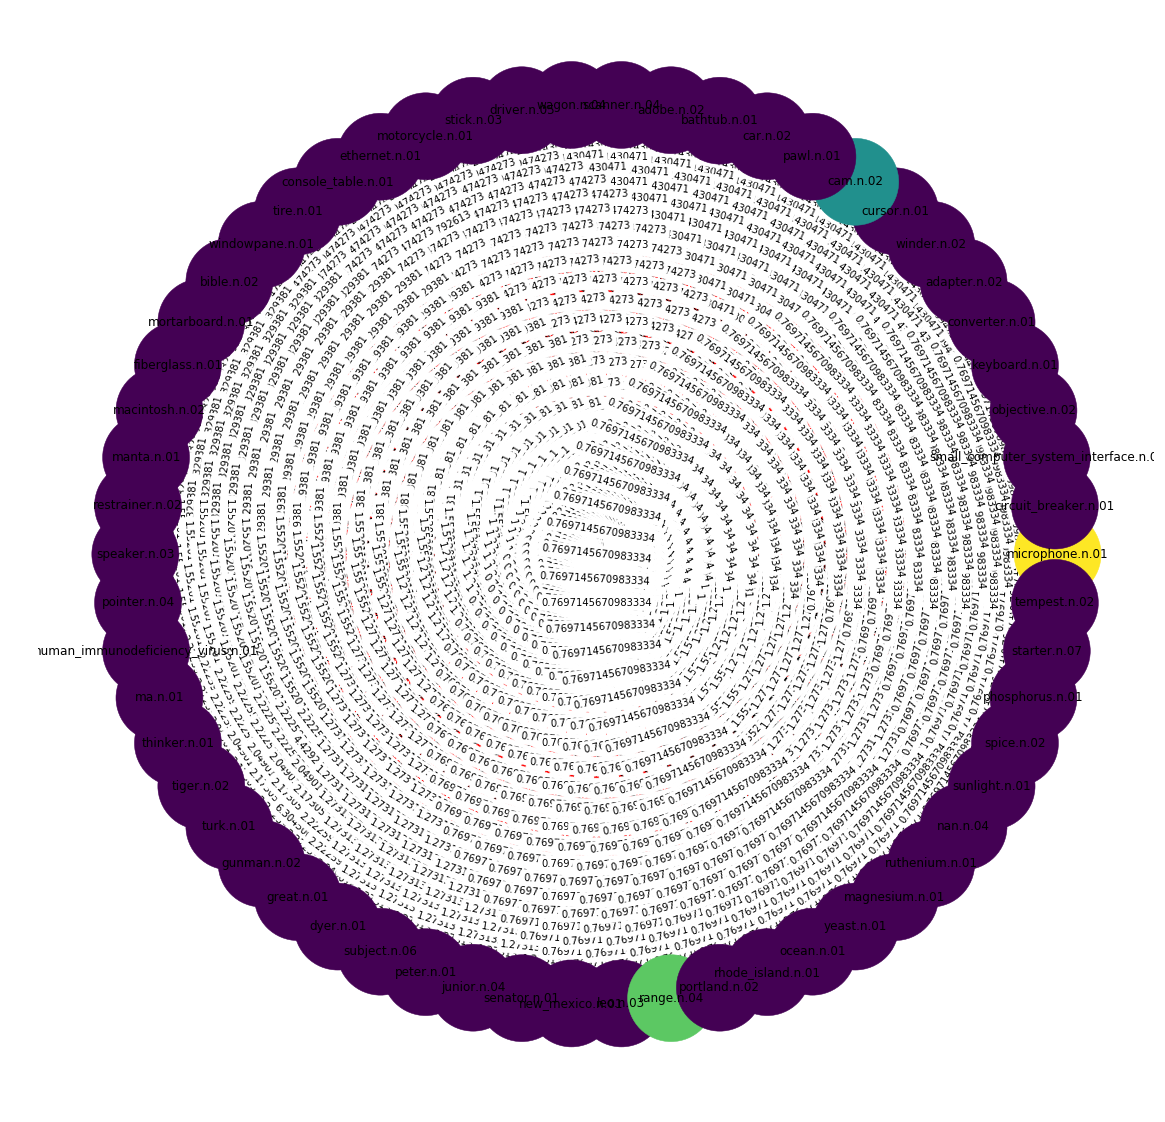

In [232]:
semantic_network_less_than_1(LH1,"T1_H1_lessthan1_20-Newsgroups.png")

### topics-terms 1 with H2 not equal zero from 20-Newsgroups dataset

In [233]:
LH2=count_top_term_top_topic('microphone.n.01', 'H2_news_group_n.csv',1,path_database)
LH2

Index(['microphone.n.01', 'small_computer_system_interface.n.01',
       'circuit_breaker.n.01', 'cursor.n.01', 'converter.n.01', 'cam.n.02',
       'keyboard.n.01', 'adapter.n.02', 'winder.n.02', 'pawl.n.01',
       'objective.n.02', 'adobe.n.02', 'bathtub.n.01', 'console_table.n.01',
       'driver.n.05', 'stick.n.03', 'scanner.n.04', 'wagon.n.04',
       'ethernet.n.01', 'car.n.02', 'motorcycle.n.01', 'windowpane.n.01',
       'manta.n.01', 'fiberglass.n.01', 'tire.n.01', 'mortarboard.n.01',
       'bible.n.02', 'macintosh.n.02', 'turk.n.01', 'great.n.01',
       'gunman.n.02', 'restrainer.n.02', 'ma.n.01', 'pointer.n.04',
       'dyer.n.01', 'subject.n.06', 'thinker.n.01', 'tiger.n.02',
       'junior.n.04', 'senator.n.01', 'peter.n.01',
       'human_immunodeficiency_virus.n.01', 'speaker.n.03', 'portland.n.02',
       'range.n.04', 'rhode_island.n.01', 'new_mexico.n.01', 'leo.n.03'],
      dtype='object')

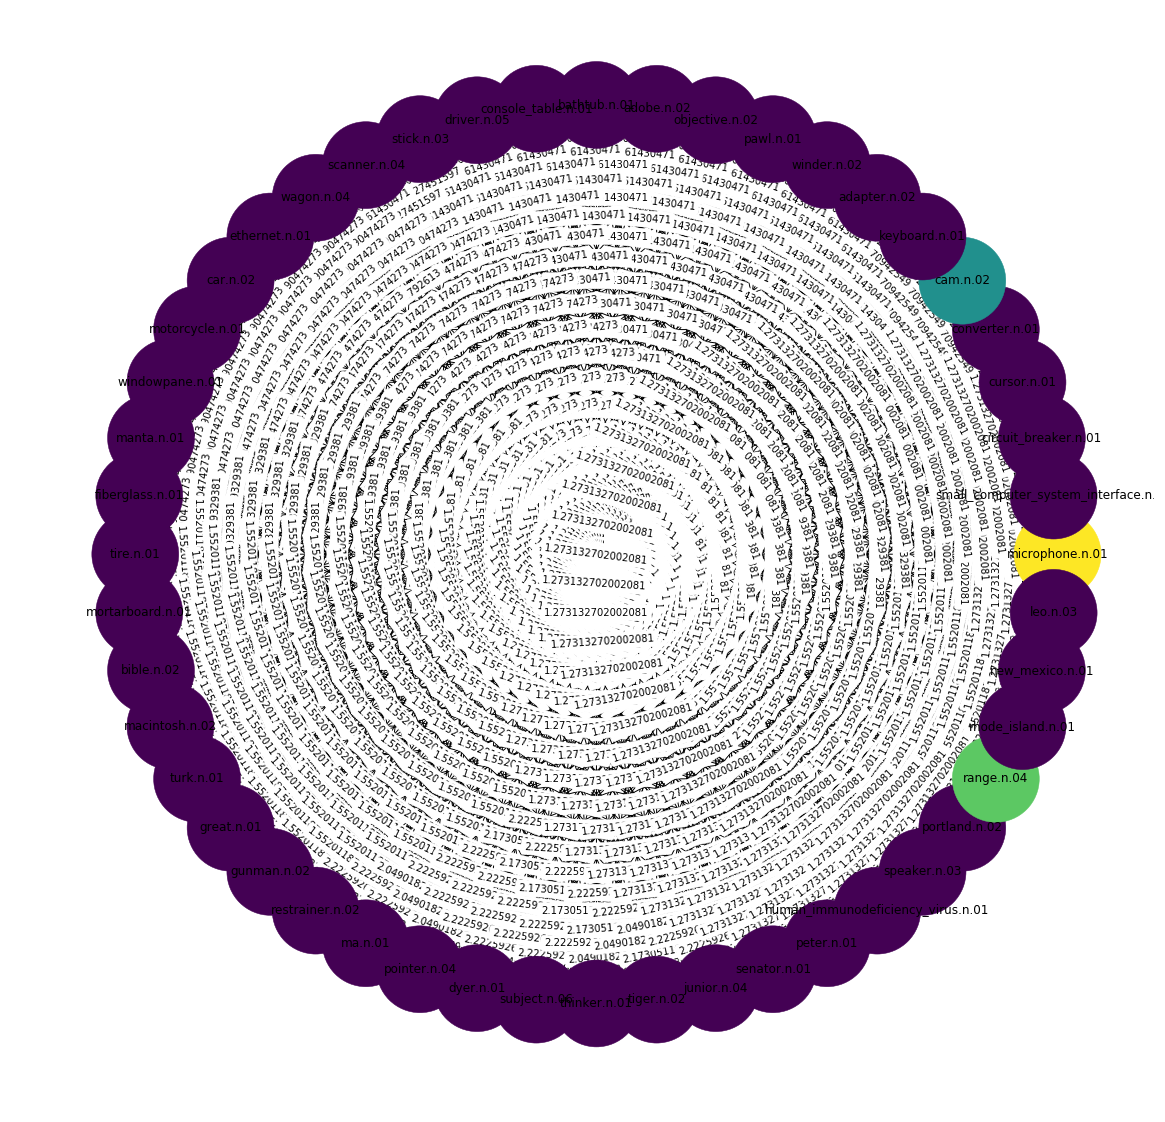

In [235]:
semantic_network(LH2,"T1_H2_20-Newsgroups.png")

### topics-terms 1 with H2 less than 1 from 20-Newsgroups dataset

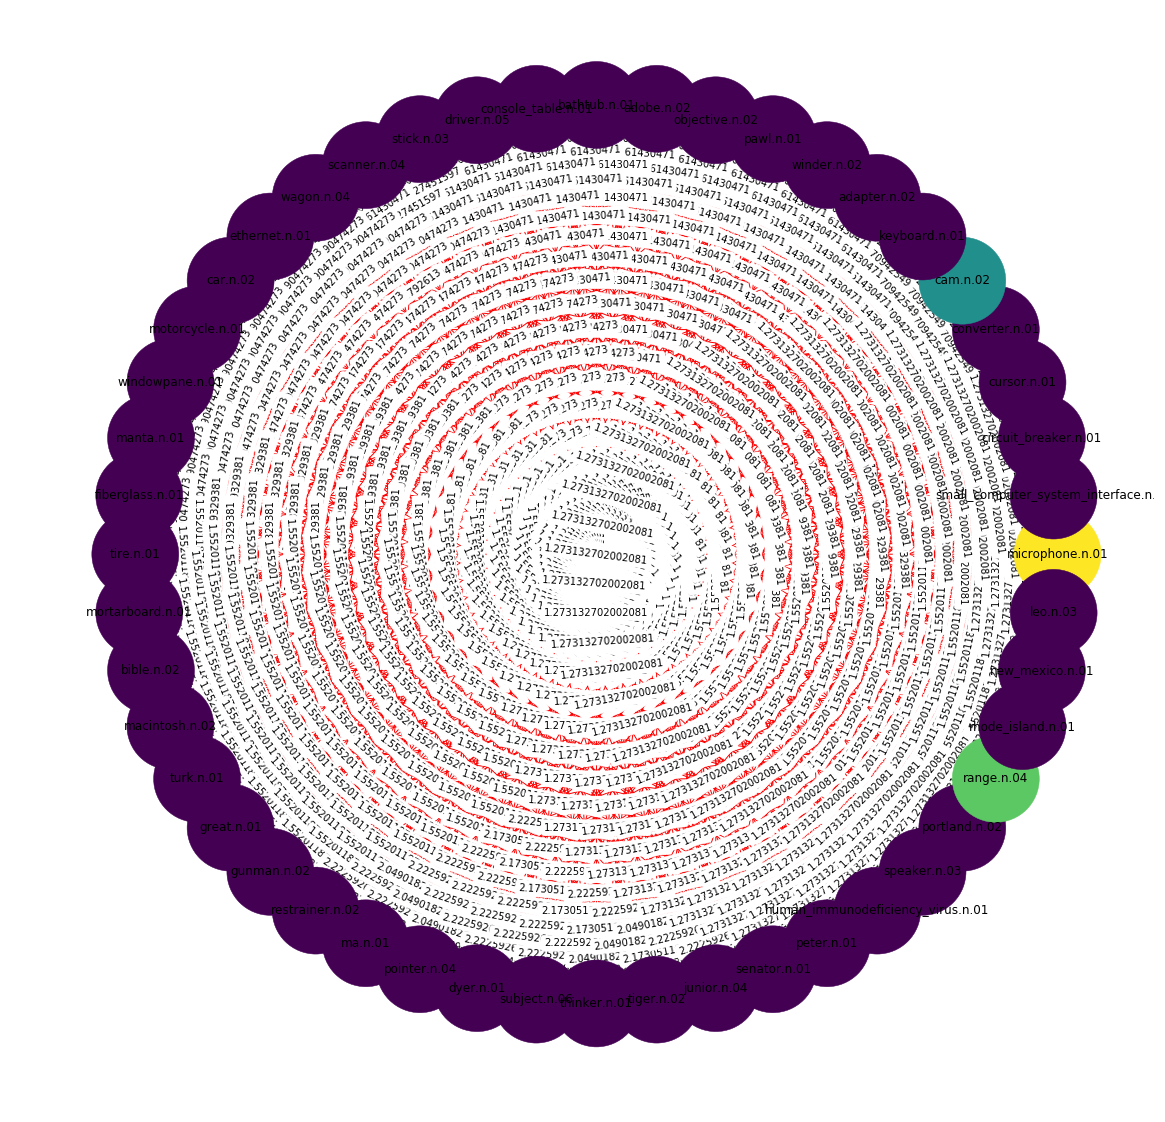

In [236]:
semantic_network_less_than_1(LH2,"T1_H2_lessthan1_20-Newsgroups.png")

### topics-terms 1 with H4 not equal zero from 20-Newsgroups dataset

In [237]:
LH4=count_top_term_top_topic('microphone.n.01', 'H4_news_group_n.csv',1,path_database)
LH4

Index(['microphone.n.01', 'small_computer_system_interface.n.01',
       'circuit_breaker.n.01', 'adapter.n.02', 'cam.n.02', 'cursor.n.01',
       'converter.n.01', 'pawl.n.01', 'keyboard.n.01', 'objective.n.02',
       'winder.n.02', 'adobe.n.02', 'scanner.n.04', 'ethernet.n.01',
       'car.n.02', 'bathtub.n.01', 'stick.n.03', 'driver.n.05',
       'motorcycle.n.01', 'wagon.n.04', 'console_table.n.01', 'manta.n.01',
       'bible.n.02', 'windowpane.n.01', 'mortarboard.n.01', 'macintosh.n.02',
       'fiberglass.n.01', 'tire.n.01', 'pointer.n.04', 'peter.n.01',
       'great.n.01', 'gunman.n.02', 'dyer.n.01', 'senator.n.01',
       'restrainer.n.02', 'human_immunodeficiency_virus.n.01', 'junior.n.04',
       'ma.n.01', 'subject.n.06', 'turk.n.01', 'thinker.n.01', 'tiger.n.02',
       'speaker.n.03', 'new_mexico.n.01', 'leo.n.03', 'portland.n.02',
       'range.n.04', 'rhode_island.n.01'],
      dtype='object')

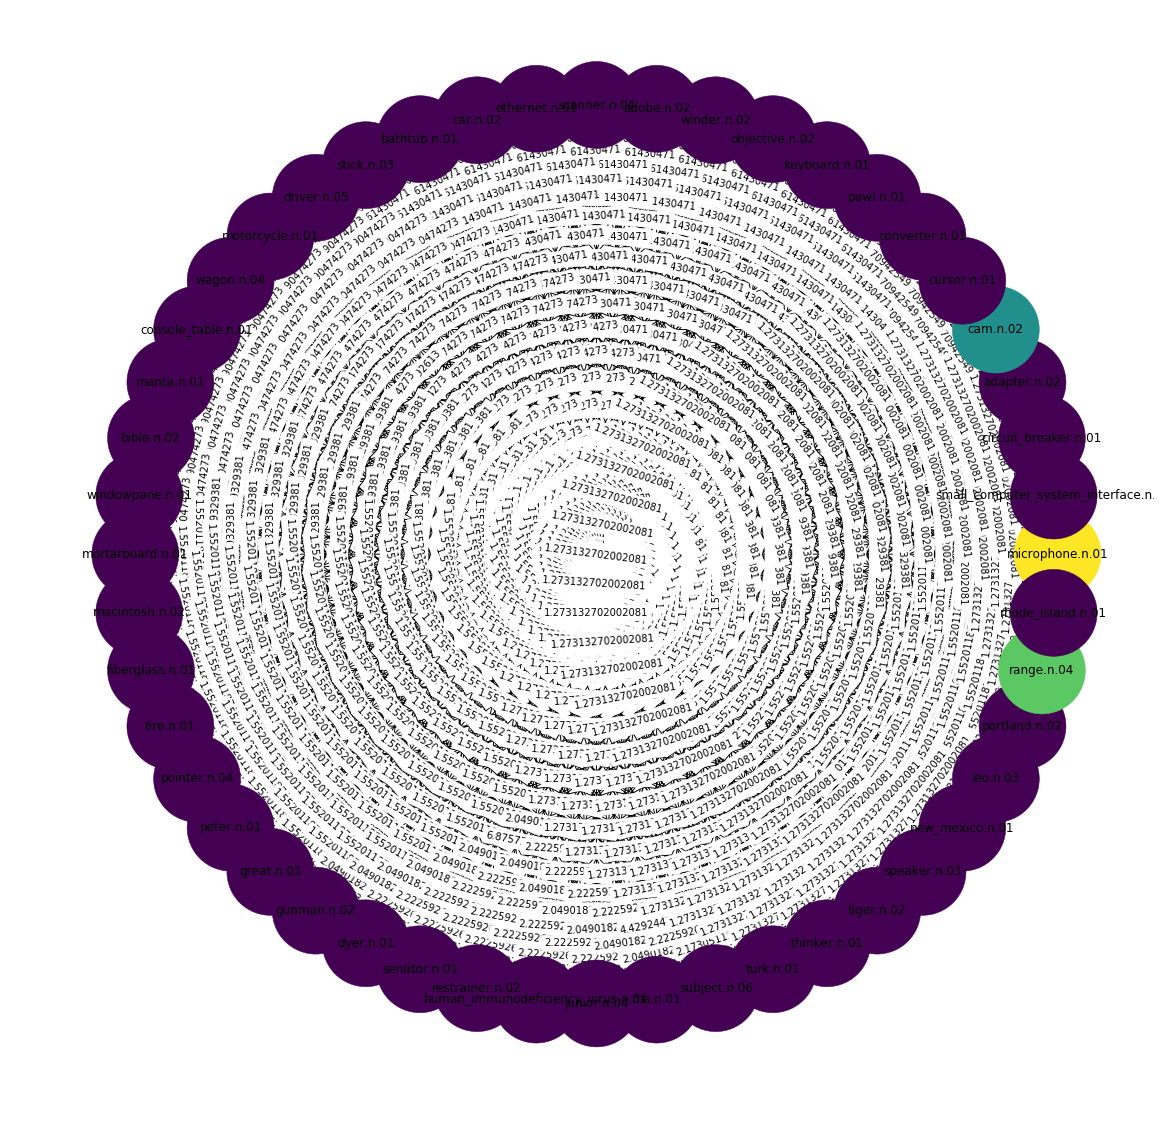

In [238]:
semantic_network(LH4,"T1_H4_20-Newsgroups.png")

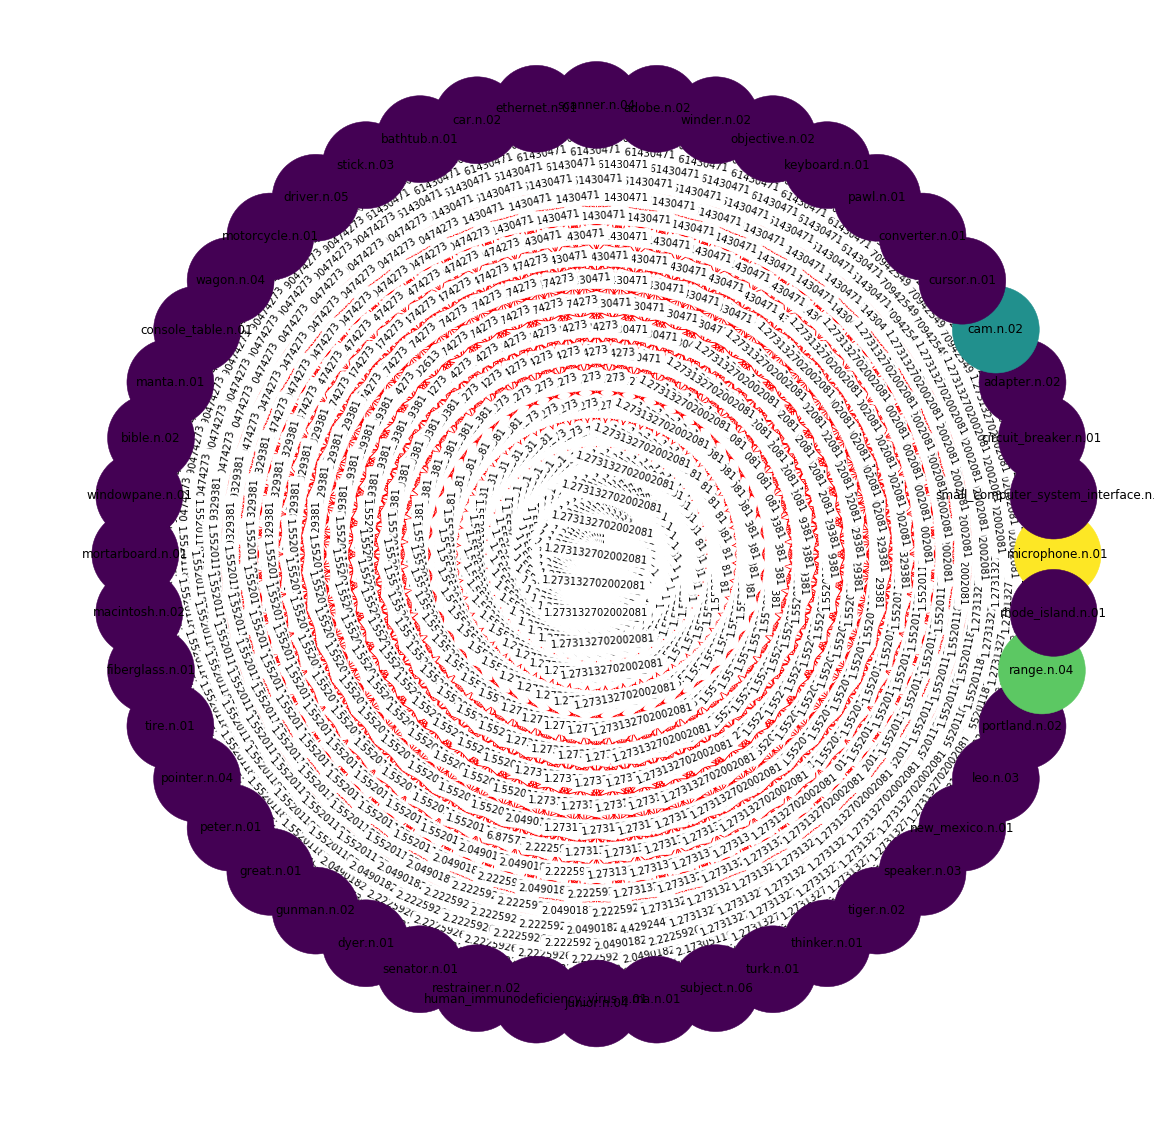

In [239]:
semantic_network_less_than_1(LH4,"T1_H4_lessthan1_20-Newsgroups.png")

In [73]:
LHSNews=count_top_term_top_topic('microphone.n.01', 'H_20_Siketleran.csv',1,path_database)
LHSNews

Index(['2', '28'], dtype='object')

In [76]:
LHSNews=df_select_subrow_byindex(path_database,'H_20_Siketleran.csv',LHSNews)


/home/fsg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


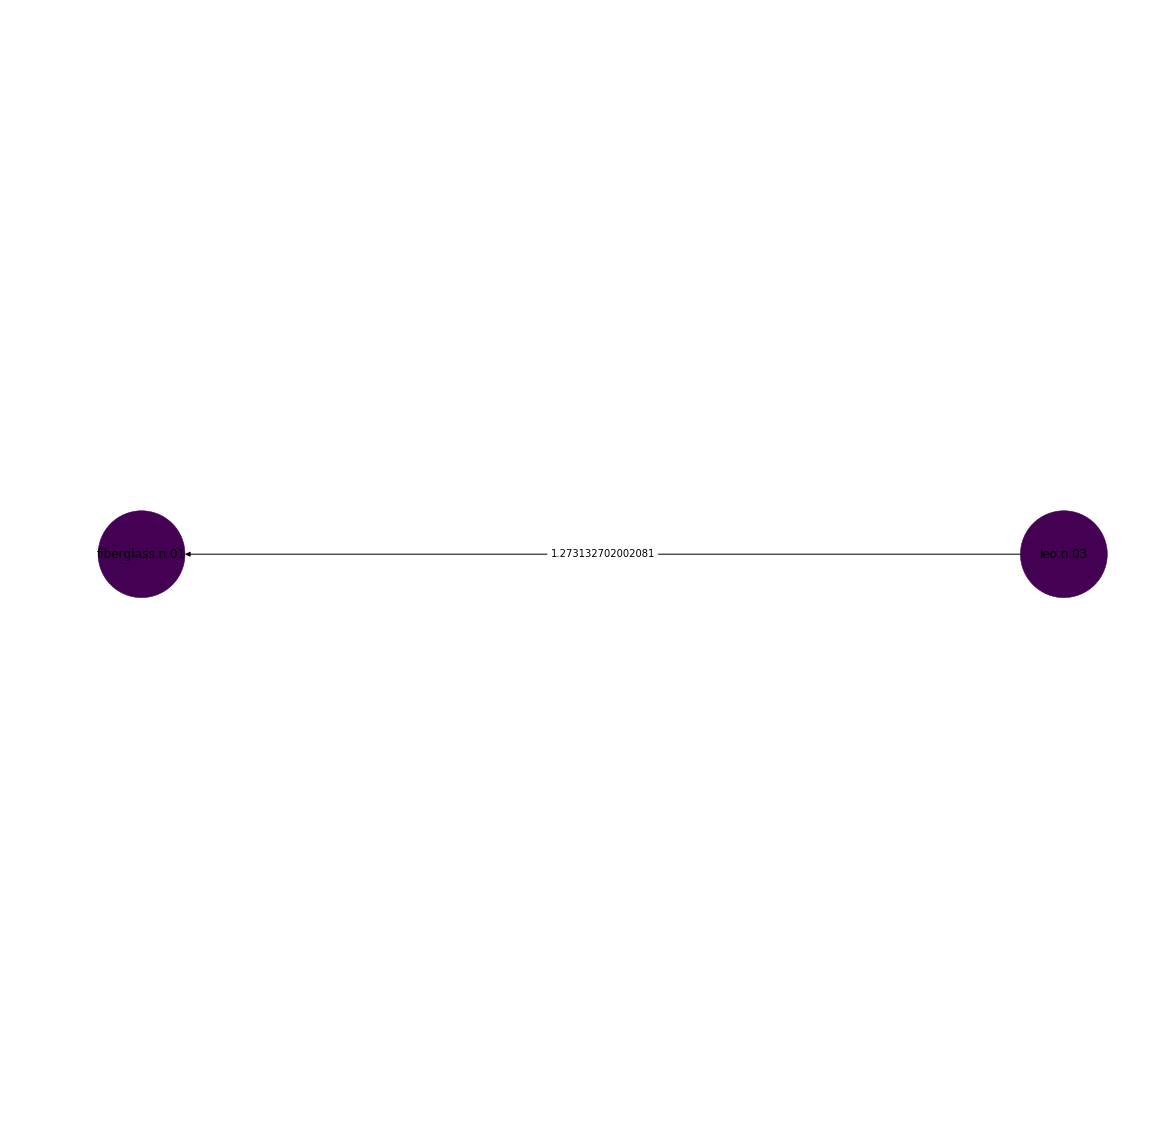

In [77]:
semantic_network(LHSNews,"T1_HSN_20-Newsgroups.png")

## april.n.01

### learned topics not equal zero per method from Reuters

In [165]:
HR1=topic_not_equal_zero_key('april.n.01','H1_news_group_reuters_n.csv',path_database)
HR1

Index(['april.n.01', 'wrinkle.n.01', 'maximum.n.03', 'sugar.n.01',
       'alberta.n.01', 'connecticut.n.01', 'acre.n.03', 'wheat.n.02',
       'burlington.n.01', 'montana.n.01', 'portland.n.02', 'soviet_union.n.01',
       'mexico.n.01', 'semolina.n.01', 'blemish.n.01', 'peer.n.01',
       'source.n.07', 'brazil_nut.n.02', 'taiwan.n.02', 'whitethorn.n.01',
       'cambodia.n.01', 'colombia.n.01', 'pale_yellow.n.01', 'jordan.n.02',
       'cargo.n.01', 'stage_set.n.01', 'algeria.n.01',
       'arabian_peninsula.n.01', 'substitute.n.02', 'sellers.n.01',
       'exporter.n.01', 'home_plate.n.01', 'argentina.n.01', 'saudi.n.01',
       'tanzania.n.01', 'roberts.n.04', 'worm.n.02', 'seaway.n.01',
       'elevator.n.01', 'ski_tow.n.01', 'offerer.n.01', 'fob.n.03',
       'paddy.n.01', 'barley.n.02', 'loanword.n.01', 'yugoslav.n.01',
       'redemption.n.02', 'rebate.n.01', 'dole.n.01', 'mission.n.04',
       'lining.n.03', 'bonus.n.02', 'estate.n.02', 'duty.n.03',
       'intravenous_feedin

In [168]:
HR2=topic_not_equal_zero_key('april.n.01','H2_news_group_reuters_n.csv',path_database)
HR2

Index(['april.n.01', 'millimeter.n.01', 'austral.n.01', 'hectare.n.01',
       'metric_ton.n.01', 'pound.n.10', 'bushel.n.02', 'volt.n.01',
       'franc.n.01', 'malted.n.01', 'nothing.n.01', 'billion.n.03',
       'month.n.02', 'season.n.03', 'workweek.n.01', 'february.n.01',
       'january.n.01', 'july.n.01', 'june.n.01'],
      dtype='object')

In [169]:
HR4=topic_not_equal_zero_key('april.n.01','H4_news_group_reuters_n.csv',path_database)
HR4

Index(['april.n.01', 'july.n.01', 'january.n.01', 'february.n.01', 'june.n.01',
       'workweek.n.01', 'season.n.03', 'bushel.n.02', 'metric_ton.n.01',
       'millimeter.n.01', 'hectare.n.01', 'month.n.02', 'nothing.n.01',
       'franc.n.01', 'pound.n.10', 'malted.n.01', 'austral.n.01',
       'billion.n.03', 'volt.n.01'],
      dtype='object')

In [170]:
HR_S=topic_not_equal_zero_key('april.n.01','H_reuters_Siketleran.csv',path_database)
HR_S

Index(['1', '35', '31', '57', '38', '59', '58', '29', '25', '45'], dtype='object')

In [ ]:
top_term_top_topic_all('april.n.01', 'H4_news_group_reuters_n.csv' ,5, 10, path_database, 'april_top__topic_term_reuters_5_10.csv')

In [ ]:
top_term_top_topic('april.n.01', 'H4_news_group_reuters_n.csv' ,5, 10, path_database, 'april_H_term_reuters_5_10.csv')

In [ ]:
t=top_term_top_topic('april.n.01', 'H_reuters_Siketleran.csv' ,5, 10, path_database, 'april_H_term_Siketleran_reuters_5_10.csv')
t

In [ ]:
top_term_top_topic_all_siketLearn('april.n.01', 'H_reuters_Siketleran.csv' ,5, 10, path_database, 'april_top__topic_term_reuters__Siket_5_10.csv',t)

### Semantic Network

In [ ]:
L3=[
'april.n.01',
'bushel.n.02',
'february.n.01',
'january.n.01',
'july.n.01',
'june.n.01',
'malted.n.01',
'millimeter.n.01',
'season.n.03',
'workweek.n.01']
semantic_network(L3,"Top_5_topics_terms_Returer_proposed.png")

In [ ]:
L4=[
'april.n.01',
'hassium.n.01',
'pale_yellow.n.01',
'redemption.n.02',
'nothing.n.01',
'workweek.n.01',
'worm.n.02',
'peer.n.01',
'government_accounting_office.n.01',
'duty.n.03']

semantic_network(L4,"Top_5_topics_terms_Returer_SiketLearn.png")

In [38]:
LHR1=count_top_term_top_topic('april.n.01', 'H1_news_group_reuters_n.csv',1,path_database)
len(LHR1)

100

In [42]:
df=read_cvs_by_pands(path_database,'H1_news_group_reuters_n.csv',0, 0)

#df.ix[df.columns[0]][df.columns[1]]
#df

/home/fsg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


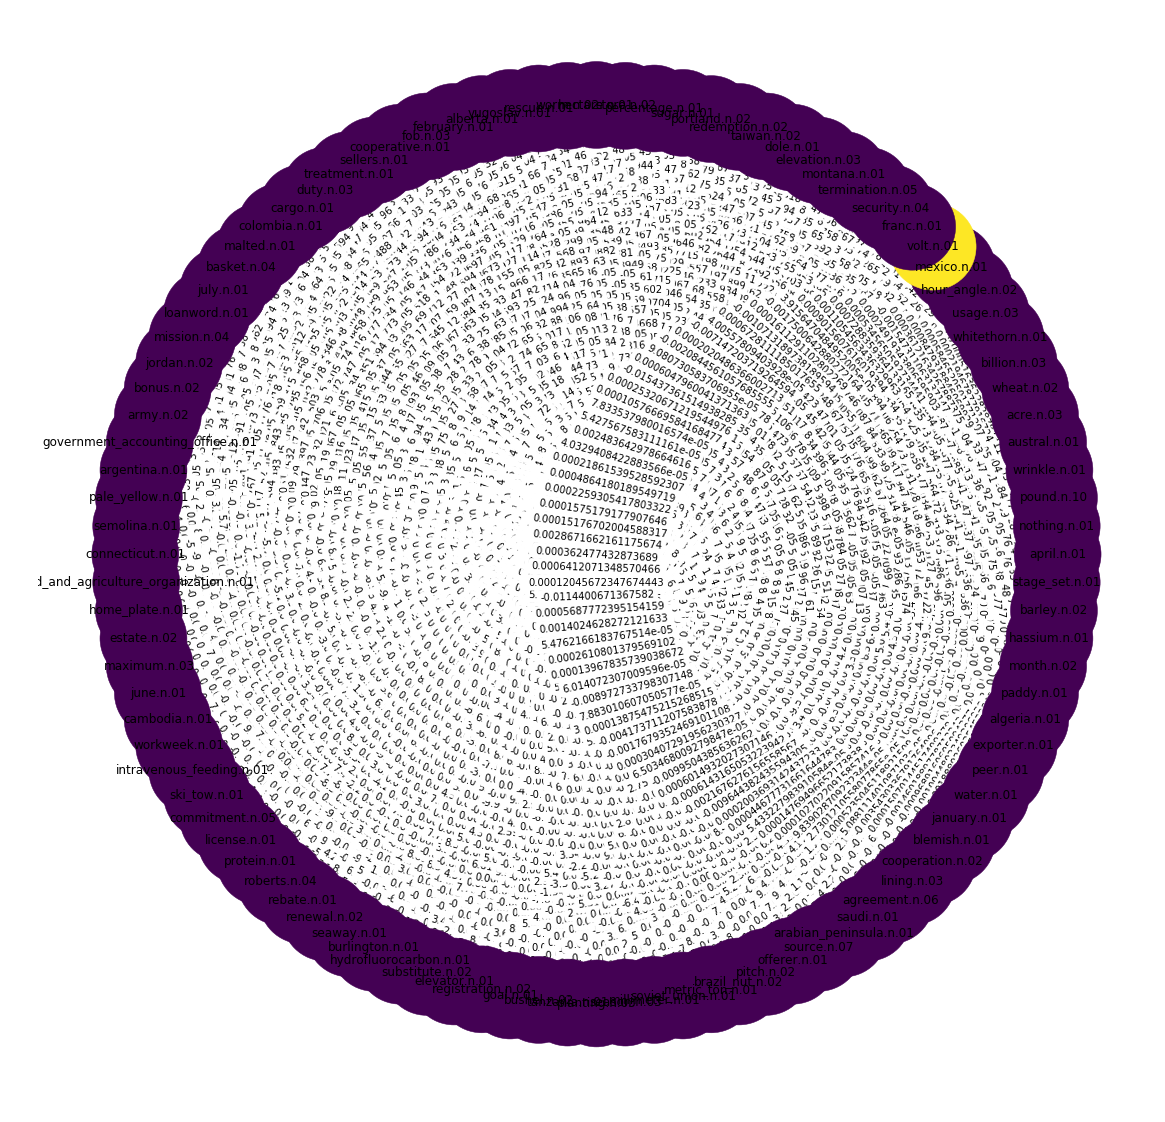

In [43]:
semantic_network_df(df,"T1_H1_Reuters.png")

In [39]:
LHR2=count_top_term_top_topic('april.n.01', 'H2_news_group_reuters_n.csv',1,path_database)
len(LHR2)

19

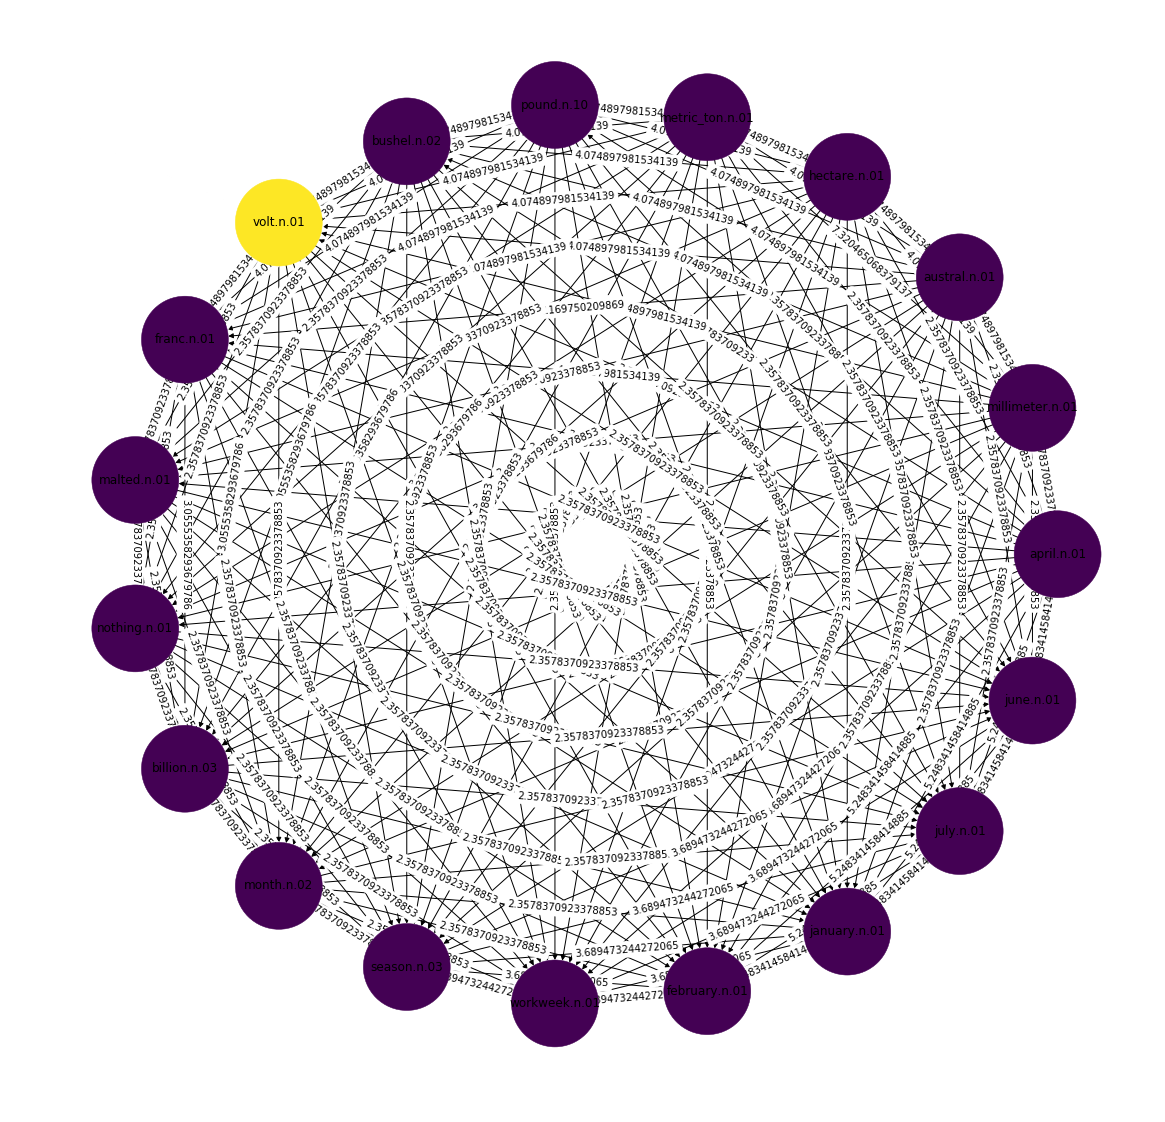

In [40]:
semantic_network(LHR2,"T1_H2_Reuters.png")

In [83]:
LHRS=count_top_term_top_topic('april.n.01', 'H_reuters_Siketleran.csv',1,path_database)
len(LHRS)
LHRS

Index(['1', '35', '31', '57', '38', '59', '58', '29', '25', '45'], dtype='object')

In [84]:
LHRS=df_select_subrow_byindex(path_database,'H_reuters_Siketleran.csv',LHRS)
LHRS

/home/fsg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


array(['nothing.n.01', 'duty.n.03', 'fob.n.03', 'workweek.n.01',
       'malted.n.01', 'ski_tow.n.01', 'intravenous_feeding.n.01',
       'alberta.n.01', 'hectare.n.01', 'army.n.02'], dtype=object)

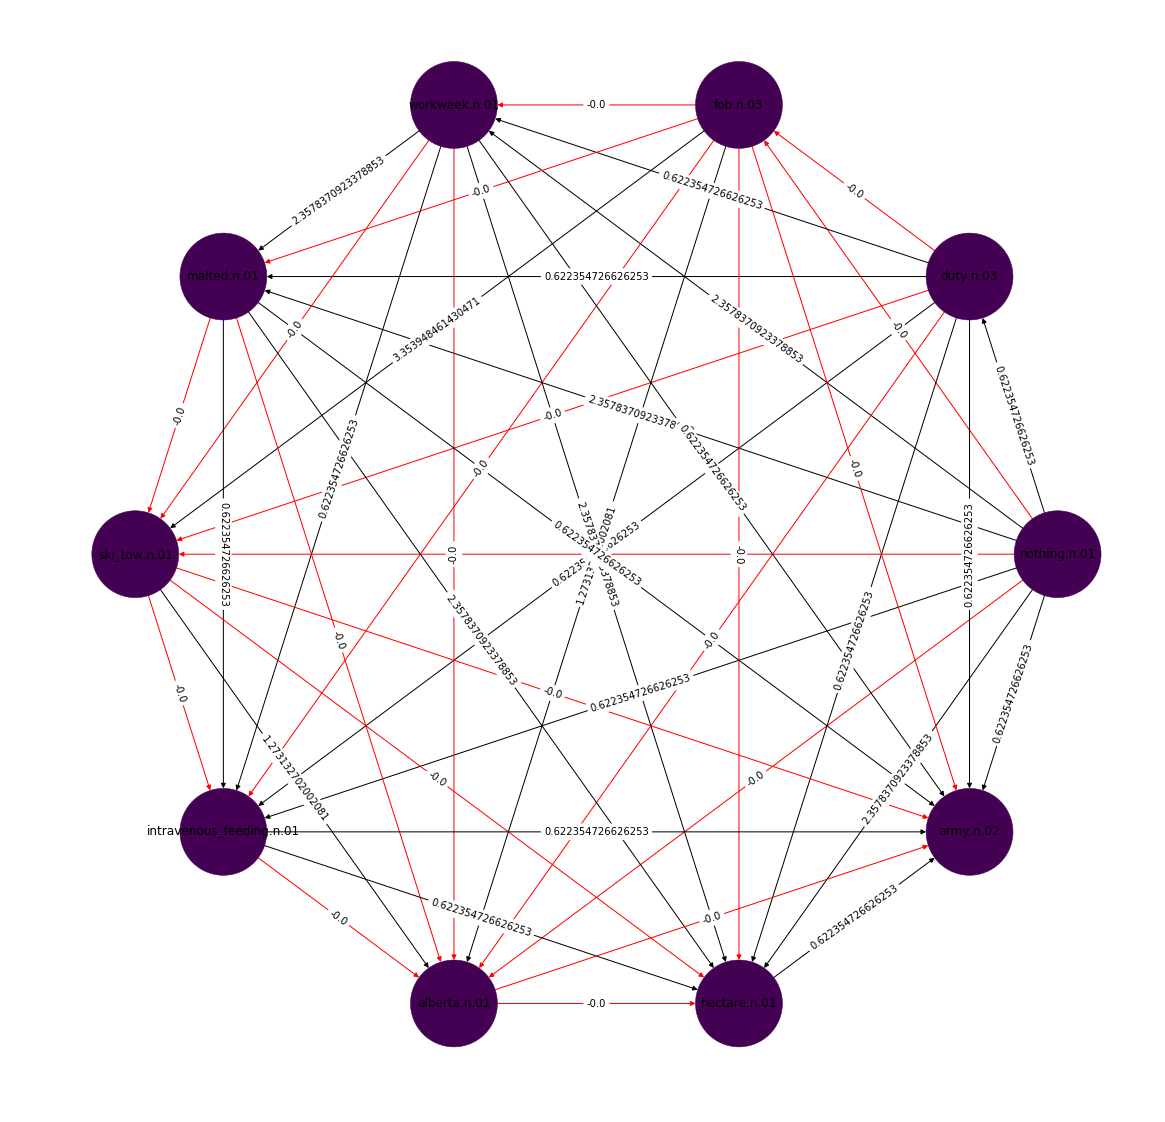

In [85]:
semantic_network(LHRS,"T1_HS_Reuters.png")

# Document

In [ ]:
top_doc_top_topic('microphone.n.01', 'H4_news_group_n.csv' ,'W4_news_group_n.csv',5, 10, path_database, 'microphone_H4_doc_news_group_5_10.csv')

In [ ]:
top_doc_top_topic('microphone.n.01', 'H_20_Siketleran.csv' ,'W_20_Siketleran.csv',5, 10, path_database, 'microphone_H_doc_20_Siketleran_5_10.csv')

In [ ]:
top_doc_top_topic("'"+'april.n.01'+"'", 'H_reuters_Siketleran.csv' ,'W_reuters_Siketleran.csv',5, 10, path_database, 'april_W_doc_Siketleran_reuters_5_10.csv')

In [ ]:
top_doc_top_topic('april.n.01', 'H4_news_group_reuters_n.csv' ,'W4_news_group_reuters_n.csv',5, 10, path_database, 'april_W4_doc_news_group_reuters_5_10.csv')

# Intersects

In [ ]:
intersect_df('microphone_H4_doc_news_group_5_10.csv','microphone_H_doc_20_Siketleran_5_10.csv')

In [ ]:
df_20_count_top_topic=count_top_topic('microphone.n.01', 'H1_news_group_n.csv','H2_news_group_n.csv','H4_news_group_n.csv','H_20_Siketleran.csv' ,5, path_database) 
df_20_count_top_topic

In [ ]:
plot_reuls_topic("microphone_top_topic_non_zero",df_20_count_top_topic)

In [ ]:
df_r_count_top_topic=count_top_topic('april.n.01', 'H1_news_group_reuters_n.csv','H2_news_group_reuters_n.csv','H4_news_group_reuters_n.csv','H_reuters_Siketleran.csv' ,5, path_database) 
df_r_count_top_topic


In [ ]:
plot_reuls_topic("april_top_topic_non_zero",df_r_count_top_topic)

In [ ]:
df=count_top_term_top_topic('microphone.n.01', 'H1_news_group_n.csv','H2_news_group_n.csv','H4_news_group_n.csv','H_20_Siketleran.csv' ,5, path_database) 
plot_reuls("microphone_top_topic_term",df[0])
#df.loc['H1'].values

In [ ]:
df[3]

In [ ]:
df2=count_top_term_top_topic('april.n.01', 'H1_news_group_reuters_n.csv','H2_news_group_reuters_n.csv','H4_news_group_reuters_n.csv','H_reuters_Siketleran.csv' ,5, path_database) 
plot_reuls("april_top_topic_term",df2[0])

In [ ]:
df_20_doc=count_top_doc_topic('microphone.n.01', 
                              'H1_news_group_n.csv',
                              'W1_news_group_n.csv',
                              'H2_news_group_n.csv',
                              'W2_news_group_n.csv',
                              'H4_news_group_n.csv',
                              'W4_news_group_n.csv',
                              'H_20_Siketleran.csv',
                              'W_20_Siketleran.csv' ,
                               5, path_database) 
df_20_doc
plot_reuls_docs("microphone_top_doc",df_20_doc[0])

In [ ]:
df_20_doc=count_top_doc_topic('april.n.01', 
                              'H1_news_group_reuters_n.csv',
                              'W1_news_group_reuters_n.csv',
                              'H2_news_group_reuters_n.csv',
                              'W2_news_group_reuters_n.csv',
                              'H4_news_group_reuters_n.csv',
                              'W4_news_group_reuters_n.csv',
                              'H_reuters_Siketleran.csv',
                              'W_reuters_Siketleran.csv' ,
                               5, path_database) 
df_20_doc
plot_reuls_docs("april_top_doc",df_20_doc[0])

In [ ]:
df_20_doc[1]

In [ ]:
df_20_doc[2]